<a href="https://colab.research.google.com/github/GeraldEspi/ADA-informes/blob/main/Informe_7_CuttingRod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Problema del corte de varillas

Una empresa especializada en corte de metalurguia requiere de cilindros en forma de vara para uso de soportes metálicos para entregarlos a un cliente. Para ello se fabrican varas grandes para cortarlas según los requirimientos especificados por el consumidor. Se busca entonces la **mejor** manera de cortar dichas varillas (costo eficiente).

![image](https://cdn.discordapp.com/attachments/838249461268217916/1024979834797043732/Dividir_7.png)

*imagen hecha en canvas*

Para la correcta solución de este problema se hace uso del algoritmo **Cutting rod** o corte de varillas en español, que calucla el precio más conveniente haciendo repetidamente cortes en distintas posiciones a lo largo de cada vara y comparando los precios de estas **sub_varas** resultantes.

>Para ello es necesario conocer, el largo de la vara a su vez que el valor del precio por medida.

**Entrada**: Largo de varilla $n$, vector de precios por cada medida $i=1..n$

**Salida**:  Retorno máximo $r_n$ que se puede obtener cortando la varilla y vendiendo las partes.

# **Código**

### I**mplementación recursiva**

>**Paradigma**: Fuerza bruta.


In [155]:
import random
from termcolor import colored

recursionCounter = 0

def cortesVarillaF(precios, largo, cortes,verbose=False):
    if(largo <= 0):
        return 0
    maxValor = -1
    global recursionCounter
    
    # Corte recursivamente la barra en diferentes piezas
    # y compare diferentes configuraciones
    for i in range(0, largo):
        if(i >= len(precios)): continue
        cutPrev = cortesVarillaF(precios, largo - i - 1, cortes, verbose)
        
        if verbose:
            print(colored("---------------------------------------------","yellow"))
            print(colored (f"La varilla es de largo: ","green"),colored(largo,"blue"))
        
        recursionCounter += 1

        if verbose: print(colored(f"Maximo valor para el largo {largo} < precio de largo {i+1} + Maximo valor para el largo {largo-i-1}","green"))
        if verbose: print(colored(f"{maxValor}","blue"),colored("<","green"), colored(precios[i],"blue"), colored("+","green"),colored(cutPrev,"blue"))
        
        if maxValor <  precios[i] + cutPrev:
            maxValor =  precios[i] + cutPrev
            if largo > 1: 
                cortes[largo] = cortes[largo-i-1] + 1
            if verbose: print(colored("El nuevo Maximo valor para el largo","green") ,colored(largo,"blue"),colored("es","green"),colored(maxValor,"blue"))

    if verbose:
            print(colored("---------------------------------------------","yellow"))
    return maxValor

n = 4
if n < 1: print("Cantidad de precios insuficientes"); exit(1)

precios = [1,5,8,9,10]
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

print(colored(f"El arreglo correspondiente al precio de las varillas es","green"),colored(f"{precios}","blue"),"\n")
print(colored("Seleccione las pulgadas de la varilla la cual se desea maximizar: ","green"), end = "")
largoVarilla = int(input())

maximoValor = cortesVarillaF(precios, largoVarilla,partesDividido, verbose = False)


print(colored(f"El mayor precio obtenible:","green"), colored (f"{maximoValor}","blue"))
print(colored(f"\n\n- Se obtienen al cortar la varilla original en","green"), colored(f"{partesDividido[largoVarilla]}","blue") ,colored("subvarillas","green"))
print(colored(f"- Realiza","green"), colored(f"{partesDividido[largoVarilla]-1}","blue"), colored("cortes","green"))
print(colored(f"- Realiza","green") ,colored(f"{recursionCounter}","blue"),colored("llamadas recursivas","green"))

El arreglo correspondiente al precio de las varillas es [1, 5, 8, 9, 10] 

Seleccione las pulgadas de la varilla la cual se desea maximizar: 4
El mayor precio obtenible: 10


- Se obtienen al cortar la varilla original en 2 subvarillas
- Realiza 1 cortes
- Realiza 15 llamadas recursivas


### **Implementación Bottom-Up**

>**Paradigma**: Programación dinámica, Bottom-Up approach.

In [165]:
import random

int_min = -3244
def cortesVarillaB(precios, largo, cortes,verbose=False):
    valores = [0 for x in range(largo+1)]
    valores[0] = 0

    # Corta de manera recursiva la barra en diferentes piezas 
    # y compara las diferentes configuraciones entre ellas
    for i in range(1, largo+1):
        if verbose:
             print(colored("---------------------------------------------","yellow"))
             print(colored("Varilla de largo correspondiente a","green"),colored(i, "blue") )
        maxValor = int_min

        for j in range(i):
              if(j >= len(precios)): continue

              if verbose: 
                    print(colored("-------------------------","yellow"))
                    print(colored("Máximo valor para el largo","green"), colored(i,"blue"), colored("<","green"),colored("precio de largo","green"),colored(j+1,"blue"),colored("+","green"),colored("máximo valor para el","green"),colored("largo","green"),colored((i-j-1),"blue"))
                    print(colored(maxValor,"blue"), colored("<","green") , colored(precios[j],"blue"),colored("+","green"),colored(valores[i-j-1],"blue"))
              if maxValor < precios[j] + valores[i-j-1]:
                  maxValor = precios[j] + valores[i-j-1]
                  if i > 1: 
                      cortes[i] = cortes[i-j-1] + 1
                  if verbose: 
                        print(colored("El nuevo Máximo valor para el largo","green") ,colored(i,"blue"), colored("es","green"), colored(maxValor,"blue"))
                        print(colored("-------------------------","yellow"))
        valores[i] = maxValor
 
    return valores[largo]
 

arr = [1,5,8,9,10]
size = 4

partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1


print(colored("Seleccione las pulgadas de la varilla la cual se desea maximizar: ","green"), end = "")
largoVarilla = int(input())

maximoValor = cortesVarillaB(precios, largoVarilla,partesDividido, verbose = False)


print(colored(f"El mayor precio obtenible:","green"), colored (f"{maximoValor}","blue"))
print(colored(f"\n\n- Se obtiene al cortar la varilla original en","green"), colored(f"{partesDividido[largoVarilla]}","blue") ,colored("subvarillas","green"))
print(colored(f"- Realiza","green"), colored(f"{partesDividido[largoVarilla]-1}","blue"), colored("cortes","green"))
print(colored(f"- Realiza","green") ,colored(f"{recursionCounter}","blue"),colored("llamadas recursivas","green"))

Seleccione las pulgadas de la varilla la cual se desea maximizar: 4
El mayor precio obtenible: 17


- Se obtiene al cortar la varilla original en 2 subvarillas
- Realiza 1 cortes
- Realiza 73 llamadas recursivas


# 2. Descripción del algoritmo

La descripción asociada al algoritmo puede reumirse de la siguiente manera:
>"Dada una vara de largo "n" y el precio asociado a cada pieza de la vara. Esta tiene que ser cortada y vendida."

El proceso una vez hecho, debería retornar el máximo valor obtenido de la venta de los trozos de vara. Se puede abordar de distintas maneras. En este caso, se busca profundizar en 2 aproximaciones específicas.

### **Fuerza Bruta**
> *Este paradigma no intenta hacer eficiente el algoritmo, utiliza los recursos del sistema sin ningún tipo optimización.*
 
La variable max_val es iniciliazada en el menor valor posible. Luego, se inicia un loop hasta que la variable de iteración sea igual al largo de la vara más uno. 

Para encontrar el máximo valor se compara el max_val con la suma del precio[i] (*que corresponde al del trozo de varilla actual*) y una llamada recursiva de la propia función, que retorna otro máximo valor. Se compara cual de las 2 es más grande a través de la función max, cual sea más grande es retornada y pasa a ser el valor máximo. Así con cada precio. 

- *i correspondería al número de la iteración que e esté ejecutando.*

### **Programación dinámica Bottom-Up**

> *La aproximación Bottom-Up por lo general intenta no utilzar recursión y buscar otras maneras de evitar comparaciones o cálculos inncesesarios.*

En primera intancia se crea una variable que corresponderá al mínimo valor posible. 

Una vez de entre a la función `cortesVarillaB` se crea una arreglo de memorización que permitirá evitar recalcular los valores intermedios. 

Para ingresar datos a este arreglo es necesario otro ciclo iterativo anidado, done i representa el ingreso óptimo si la vara fuera corta un número de i-veces. Esta tabla es la principal diferencia entre los 2 paradigmas, pues permite optimizar en gran medida los tiempos de ejecución.

- *i correspondería al número de la iteración que e esté ejecutando.*

A su vez permite incluso evitar la recusrión, ya que no es necesario recalcular el valor que nos entregaba la llamada recursiva en la proximación por fuerza bruta.











## 2.1 Ejemplo código




### **Recurisvo: Fuerza Bruta**

In [163]:
precios = [2,6,15]
partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1

print(colored(f"El arreglo correspondiente al precio de las varillas es","green"),colored(f"{precios}","blue"),"\n")
print(colored("Seleccione las pulgadas de la varilla la cual se desea maximizar: ","green"), end = "")
largoVarilla = int(input())

maximoValor = cortesVarillaF(precios, largoVarilla,partesDividido, verbose =True)
print(colored(f"El mayor precio obtenible:","green"), colored (f"{maximoValor}","blue"))
print(colored(f"\n\n- Se obtienen al cortar la varilla original en","green"), colored(f"{partesDividido[largoVarilla]}","blue") ,colored("subvarillas","green"))
print(colored(f"- Realiza","green"), colored(f"{partesDividido[largoVarilla]-1}","blue"), colored("cortes","green"))
print(colored(f"- Realiza","green") ,colored(f"{recursionCounter}","blue"),colored("llamadas recursivas","green"))

El arreglo correspondiente al precio de las varillas es [2, 6, 15] 

Seleccione las pulgadas de la varilla la cual se desea maximizar: 4
---------------------------------------------
La varilla es de largo:  1
Maximo valor para el largo 1 < precio de largo 1 + Maximo valor para el largo 0
-1 < 2 + 0
El nuevo Maximo valor para el largo 1 es 2
---------------------------------------------
---------------------------------------------
La varilla es de largo:  2
Maximo valor para el largo 2 < precio de largo 1 + Maximo valor para el largo 1
-1 < 2 + 2
El nuevo Maximo valor para el largo 2 es 4
---------------------------------------------
La varilla es de largo:  2
Maximo valor para el largo 2 < precio de largo 2 + Maximo valor para el largo 0
4 < 6 + 0
El nuevo Maximo valor para el largo 2 es 6
---------------------------------------------
---------------------------------------------
La varilla es de largo:  3
Maximo valor para el largo 3 < precio de largo 1 + Maximo valor para el largo 

### **Dinámico: Bottom Up**



In [167]:
arr = [2,6,15]

partesDividido = [0 for x in range(n+1)]
partesDividido[1] = 1
print(colored("Seleccione las pulgadas de la varilla la cual se desea maximizar: ","green"), end = "")
largoVarilla = int(input())
maximoValor = cortesVarillaB(precios, largoVarilla,partesDividido, verbose = True)
print(colored(f"El mayor precio obtenible:","green"), colored (f"{maximoValor}","blue"))
print(colored(f"\n\n- Se obtiene al cortar la varilla original en","green"), colored(f"{partesDividido[largoVarilla]}","blue") ,colored("subvarillas","green"))
print(colored(f"- Realiza","green"), colored(f"{partesDividido[largoVarilla]-1}","blue"), colored("cortes","green"))
print(colored(f"- Realiza","green") ,colored(f"{recursionCounter}","blue"),colored("llamadas recursivas","green"))

Seleccione las pulgadas de la varilla la cual se desea maximizar: 4
---------------------------------------------
Varilla de largo correspondiente a 1
-------------------------
Máximo valor para el largo 1 < precio de largo 1 + máximo valor para el largo 0
-3244 < 2 + 0
El nuevo Máximo valor para el largo 1 es 2
-------------------------
---------------------------------------------
Varilla de largo correspondiente a 2
-------------------------
Máximo valor para el largo 2 < precio de largo 1 + máximo valor para el largo 1
-3244 < 2 + 2
El nuevo Máximo valor para el largo 2 es 4
-------------------------
-------------------------
Máximo valor para el largo 2 < precio de largo 2 + máximo valor para el largo 0
4 < 6 + 0
El nuevo Máximo valor para el largo 2 es 6
-------------------------
---------------------------------------------
Varilla de largo correspondiente a 3
-------------------------
Máximo valor para el largo 3 < precio de largo 1 + máximo valor para el largo 2
-3244 < 2 + 6


## 2.3 Ejemplo escrito

Arreglo de precios = $[2,6,15]$

n = 4

1.- En primera instancia se comienza con un largo de varilla correspondiente a 1 

2.- luego se compara el valor maximo con el primer precio de la lista de precios

3.- Como 2 es mayor que el número máximo en ese momento ( correspondiente a un número muy pequeño en un inicio ) este pasa a ser el número maximo, el anterior pasa a ser almacenado en un arreglo auxiliar.

4.- Luego se repite el proceso sumando el anterior dato. gurdado en arrelgo En este caso como el anterior era 2, el número máximo pasa a convertirse en 4.

5.- Se repite este proceso para cada tamaño hasta llegar a la cifra de 17 que corresponderia a la suma de 15 + 2

- Se obtiene al cortar la varilla original en 2 subvarillas
- Realiza 1 cortes
- Realiza 73 llamadas recursivas

# 3. Tiempo de ejecución

### **Bottom-up**

### Teorema (Complejidad Temporal).

El algoritmo Cutting To Rod implementado a traves de Bottom-up tiene un tiempo de ejecución de $O(n^2)$ .

### Prueba del teorema.
**Lógica**

Para la resolución de este problema tenemos 2 bucles, el bucle grande es para recorrer los subproblemas a resolver antes de ser capaz de resolver el problema real

Para la resolución de este problema tenemos 2 bucles, el bucle grande es para recorrer los subproblemas a resolver antes de ser capaz de resolver el problema real (refiriéndose al aquellos problemas con menor tamaño al pedido).

Cada problema tiene en cuenta que tenemos el retorno máximo de sus subproblemas (el problema para cualquier tamaño menor al pedido). Y con ese dato, dentro del bucle chico se resuelve el problema en un tiempo de ejecución $n-1 \rightarrow O(n)$.

Para el retorno máximo del tamaño pedido se deben resolver $n-1$ subproblemas antes de resolver el problema real.

El problema real también tiene un tiempo de ejecución $n-1 \rightarrow O(n)$.

Entonces se trata de resolver  veces un problema con tiempo de ejecución $O(n)$ Por eso el algoritmo **bottom**-**up** para resolver `CuttingToRod` es de $n * (n-1) → O(n^2)$

**Problema matemático**

Podemos ver el tiempo de ejecución de todos los subproblemas como sumatoria, debemos resolver todos los subproblemas de tamaño $j=0...n-1$, el total de tiempo de ejecución de los subproblemas seria la suma de todos los subproblemas.

Cada subproblema tiene tiempo de ejecución 
$T_{sub}(n) = n$.

$\displaystyle \sum_{j=0}^{n-1}T_{sub}(j) = \frac{(n-1)(n-2)}{2} = \frac{n^2 - 3n + 2}{2} → O(n^2)$

Y el tiempo de ejecución del problema sería el de los subproblemas más  (siendo  el tiempo del problema con los subproblemas resueltos).

$T(n) = \displaystyle \sum_{j=0}^{n-1}T_{sub}(j) + n = \frac{(n-1)(n-2)}{2} + n= \frac{n^2 - 3n + 2}{2} + n = \frac{n^2 - n + 2}{2} → O(n^2)$

### Teorema (Complejidad Espacial).

El algoritmo `Cutting To Rod` implementado a traves de Bottom-up tiene un almacenamiento usado de $O(n)$.

Prueba del teorema.
Para la resolución de este problema, además de los datos necesario que deben ser proporcionados, se debe crear un arreglo de valores $V$ de tamaño $n+1$, donde se irán guardando los retornos máximos de cada subproblema.

Por ejemplo, en el cuando tengamos el tamaño $x=4$, guardaremos su retorno máximo en $V_4$ para su posterior uso cuando tengamos $x=x+1$.

Por eso la memoria extra que requiere el problema es de $n+1 \rightarrow O(n)$.



# 4.Correctitud

### Teorema (Correctitud).
El algoritmo entrega el máximo retorno posible de una varilla de tamaño $n$.

### Prueba del Teorema

Probaremos la siguiente propiedad invariante de bucle para el algoritmo `Cutting To Rod:`
> Al comienzo de cada iteración  del bucle más grande, tendremos el máximo retorno de la varilla de largo $i=i-1...0$ calculado y guardado.

### Inicialización

Al comienzo de la primera iteración $i=1$ tendremos el máximo retorno de la varilla $i-1=0$ lo cual es cierto, pues independientemente de los precios aplicados, una varilla de largo 0 siempre valdrá 0.

### Mantención

Aplicando inducción, asumimos que al comienzo de cada iteración se cumple la propiedad. Es decir, en la iteración $i$ tenemos el retorno máximo para los problemas $i=i-1...0$ calculado.

Consideremos que $i=x$ como el tamaño del problema con $x < n$.

Dentro del bucle más pequeño, se ira obteniendo el precio de varilla de tamaño $a$ + retorno máximo del tamaño $b$ de tal manera que $a+b=x$  medida que el tamaño de la varilla ($a$) aumenta, el retorno máximo con el que se suma disminuye, cada iteración del segundo bucle se compara la suma con el valor máximo guardado, y se reemplaza si es mayor, de esa manera tendremos el retorno máximo para el tamaño $x$.

Al finalizar la iteración $i=x$ (y al comienzo de la siguiente $i=x+1$), se seguirá cumpliendo la **propiedad invariante**.

### Correctitud

Finalmente, como la propiedad de bucle invariante es verdadera al incio del bucle y se mantiene en cada iteración, podemos decir que al finalizar la $n$-ésima iteración del algoritmo, se obtendra el retorno maximo de una varilla de largo $n$.







# 5. Experimentos

A continuación se realizarán experimentos los cuales incluyen investigar:

* Observar lo que ocurre con el tiempo de ambos algoritmos a medida que crece el tamaño del problema.
* Observar la cantidad de problemas que debe resolver el acercamiento bottom-up a medida que el problema crece.




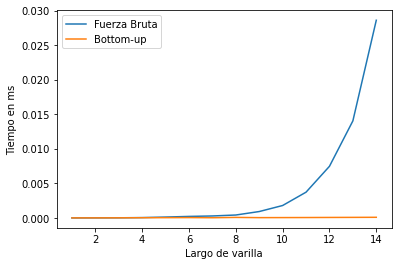

In [129]:
import matplotlib.pyplot as plt
import datetime
import random
from timeit import repeat

x=[]; y=[] ; y1=[] ; verbose = False
for largoVarilla in range(1,15):
    # ---------------
    a = random.sample(range(5, 100), largoVarilla)
    #la función repeat está ejecutando 20 veces insertionSort con el arreglo a y retorna el mejor tiepo obtenido.
    t = repeat(setup="from __main__ import cortesVarillaF", stmt=f"cortesVarillaF({a}, {largoVarilla})", repeat=1, number=5)
    t1 = repeat(setup="from __main__ import cortesVarillaB", stmt=f"cortesVarillaB({a}, {largoVarilla})", repeat=1, number=5)
    x.append(largoVarilla)
    y.append(t)
    y1.append(t1)

plt.plot(x,y)
plt.plot(x,y1)
plt.legend(["Fuerza Bruta","Bottom-up"])
plt.xlabel('Largo de varilla')
plt.ylabel('Tiempo en ms')
plt.show()

# Análisis de resultados

Complejidades temporales promedio:

> Fuerza bruta: $O(n^n)$ 


> Bottom Up: $O(n^2)$





Tal como indican sus tiempos de ejecución, los resultados mostrados eran esprables. La diferencia es lo suficientemente notoria como para opacar el crecimiento de la gráfica de BottomUp.

>La marcada diferenciación de las 2 gráficas comienza a partir de las 15 unidades que representan el largo de la varilla. Esta anomalía puede tener causa en el hecho de que, el tiempo de ejecucuón de la manera recursiva crece de manera **exponencial**, oséase, que cada unidad de largo de varilla representará una muy notoria diferencia de eficiencia respecto al tiempo de ejecución con un largo menor.

El algoritmo requiere de llamarse **recursivamente** a sí mismo para encontrar el valor anterior para así porder compararlo y establecer cual es el mayor número. Para ello, requiere de repetir el proceso de recursividad hasta llegar al primer número del arreglo y así poder obtener correctamente el número necesario para la comparación, como es evidente, no hay ningún tipo de optimización en este procedimiento, demostrando claramente como el paradigma de esta resolución corresponde a **Fuerza Bruta**. Lo que propiamente explica los resultados de la gráfica.






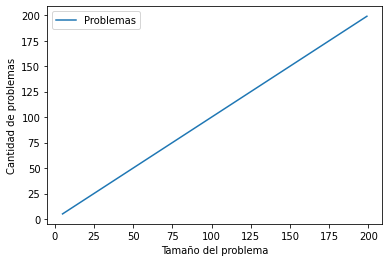

In [ ]:
import matplotlib.pyplot as plt

y1=[n for n in range(5,200)] # Cantidad de problemas
x=[n for n in range(5,200)]

plt.plot(x,y1)
plt.legend(["Problemas"])

plt.xlabel('Tamaño del problema')
plt.ylabel('Cantidad de problemas')
plt.show()

Es evidente que la cantidad de problemas a resolver crece de manera lineal en función del tamaño del problema, esto era esperable ya que la forma en la que está implementado CuttingRod por Bottom-up, mientras más grande sea el problema a resolver, más cantidad de problemas tendrá que solventar.  